## MLP 공용 관리비 분석 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")


In [2]:
#데이터로드
apartdata=pd.DataFrame()
result=[]
for year in range(2015,2020): #5년
    for month in ['01','02','03','04','05','06','07','08','09','10','11','12']:
        df=pd.read_excel('관리비데이터/{}{} 가양도시개발공사8단지(임대).xls'.format(year,month), header=2)
        df['년']=year
        df['월']=month
        apartdata = pd.concat([apartdata,df], axis=0 ,ignore_index=True)  
        
apartdata

,분류 (클릭시 상세내역표시),우리단지총액,우리단지단가,유사단지군 평균,관리비수준,전년동월,전년동월대비,전월,전월대비,34.44㎡,34.44㎡.1,39.6㎡,39.6㎡.1,39.6㎡.2,49.5㎡,49.5㎡.1,49.5㎡.2,우리단지단가(주거전용면적 기준),년,월
0,공용관리비,56133060,1233,1193.0,보통수준,1229,4▲,1159,74▲,42469.550781,42469.550781,48832.585938,48832.585938,48832.585938,61040.734375,61040.734375,61040.734375,1233,2015,01
1,일반관리비,20075760,441,613.0,다소낮음,424,17▲,399,42▲,15189.062500,15189.062500,17464.775391,17464.775391,17464.775391,21830.970703,21830.970703,21830.970703,441,2015,01
2,인건비,18667600,410,582.0,다소낮음,401,9▲,378,32▲,14123.666016,14123.666016,16239.755859,16239.755859,16239.755859,20299.695312,20299.695312,20299.695312,410,2015,01
3,급여,10535010,231,NaN,-,233,2▼,217,14▲,7970.652832,7970.652832,9164.862305,9164.862305,9164.862305,11456.078125,11456.078125,11456.078125,231,2015,01
4,제수당,2660010,58,NaN,-,58,0,49,9▲,2012.529297,2012.529297,2314.058105,2314.058105,2314.058105,2892.572754,2892.572754,2892.572754,58,2015,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,월사용액,0,0,NaN,-,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2019,12
4196,충당금잔액,0,0,NaN,-,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2019,12
4197,적립요율(%),0,0,NaN,-,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,2019,12
4198,합계,135856020,2985,NaN,-,2933,52▲,2539,446▲,102786.914062,102786.914062,118187.046875,118187.046875,118187.046875,147733.812500,147733.812500,147733.812500,2985,2019,12


## 공용 관리비 / 개별 관리비로 분리


#### * 공용관리비: 일반관리비,  청소비 , 경비비 , 소독비 , 승강기 유지비, 수선 유지비, 난방 공용, 급탕 공용, 가스 공용, 전기 공용, 수도 공용

개별관리비: 난방비, 급탕비,가스사용료, 전기료, 수도료

In [3]:
apartdata=apartdata.drop(['34.44㎡.1','39.6㎡.1','39.6㎡.2','49.5㎡.1','49.5㎡.2','우리단지단가(주거전용면적 기준)'], axis=1, inplace=False)

In [4]:
apartdata.columns = ['분류', '우리단지총액', '우리단지단가', '유사단지군 평균', '관리비수준', '전년동월',
       '전년동월대비', '전월', '전월대비', '34.44m2', '39.6m2', '49.5m2','년','월']

In [5]:
apartdata

,분류,우리단지총액,우리단지단가,유사단지군 평균,관리비수준,전년동월,전년동월대비,전월,전월대비,34.44m2,39.6m2,49.5m2,년,월
0,공용관리비,56133060,1233,1193.0,보통수준,1229,4▲,1159,74▲,42469.550781,48832.585938,61040.734375,2015,01
1,일반관리비,20075760,441,613.0,다소낮음,424,17▲,399,42▲,15189.062500,17464.775391,21830.970703,2015,01
2,인건비,18667600,410,582.0,다소낮음,401,9▲,378,32▲,14123.666016,16239.755859,20299.695312,2015,01
3,급여,10535010,231,NaN,-,233,2▼,217,14▲,7970.652832,9164.862305,11456.078125,2015,01
4,제수당,2660010,58,NaN,-,58,0,49,9▲,2012.529297,2314.058105,2892.572754,2015,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4195,월사용액,0,0,NaN,-,0,0,0,0,0.000000,0.000000,0.000000,2019,12
4196,충당금잔액,0,0,NaN,-,0,0,0,0,0.000000,0.000000,0.000000,2019,12
4197,적립요율(%),0,0,NaN,-,0,0,0,0,0.000000,0.000000,0.000000,2019,12
4198,합계,135856020,2985,NaN,-,2933,52▲,2539,446▲,102786.914062,118187.046875,147733.812500,2019,12


In [6]:
apartdata = apartdata.groupby(['년','월','분류'])['우리단지총액'].sum().unstack()

In [7]:
apartdata

분류             건강보험료        고용보험료        공과금중 전기료        관리용품구입비        국민연금  \
년    월                                                                         
2015 01       465600       115360               0              0      631840   
     02       426560       135480               0              0      631840   
     03       465600       105070               0              0      631840   
     04       421480       122470               0              0      631840   
     05       496080       298580               0              0      631840   
     06       437590       127530               0              0      634090   
     07       473130       120680               0              0      644620   
     08       473130       133800               0              0      644620   
     09       364980       129990               0              0      659250   
     10       473670            0               0              0      659250   
     11       473670       358850               0              0      659250   
     12       473670       131820               0              0      659250   
2016 01       477580       180060               0              0      659250   
     02       533280       126270               0              0      659250   
     03       505430       126270               0              0      659250   
     04       555150       139500               0              0      659250   
     05       505430       163440               0              0      659250   
     06       505430       137680               0              0      659250   
     07       489700        35890               0              0      665120   
     08       507060       135970               0              0      665120   
     09       468800       134840               0              0      665120   
     10       505430       122050               0              0      583990   
     11       505430       151090               0              0      583990   
     12       505430       139480               0              0      583990   
2017 01       530320       134520               0              0      583990   
     02       530320       134520               0              0      583990   
     03       530320       143400               0              0      583990   
     04       407000       148940               0              0      583990   
     05       507390       197700               0              0      583990   
     06       530320       146270               0              0      672730   
     07       530320       147660               0              0      672730   
     08       530320       147660               0              0      690290   
     09       602590       148900               0              0      690290   
     10       528690       143940               0              0      693890   
     11       528690       146900               0              0      693890   
     12       528690       146900               0              0      693890   
2018 01       543250       138130               0              0      693890   
     02       623650       138130               0              0      693890   
     03       583450       138130               0              0      693890   
     04       494590       156700               0              0      693890   
     05       584610       144500               0              0      695270   
     06       583450       156960               0              0      693890   
     07       583450       156700               0              0      712870   
     08       583450       156700               0              0      712870   
     09       583450       123250               0              0      712840   
     10       583450       151600               0              0      712870   
     11       748750       156160               0              0      783720   
     12       512530       156160               0              0      684720   


##  공용관리비 EDA

In [13]:
apartdata_c=apartdata.loc[:,['  일반관리비', '  청소비' , '  경비비', '  소독비', '  승강기유지비', '  수선유지비','    난방 공용','    급탕 공용','    가스 공용','    전기 공용','    수도 공용']]

In [15]:
#급탕공용, 가스공용의 모든값이 0을 가짐. 그러므로, 공용관리비에서 제외.

#공용관리비 분석에 용이한 Features만 가지고 분석 
apartdata_c=apartdata_c.loc[:,['  일반관리비', '  청소비' , '  경비비', '  소독비', '  승강기유지비', '  수선유지비','    난방 공용','    전기 공용','    수도 공용']]

In [16]:
apartdata_c.describe()

분류,일반관리비,청소비,경비비,소독비,승강기유지비,수선유지비,난방 공용,전기 공용,수도 공용
count,6.000000e+01,6.000000e+01,6.000000e+01,60.000000,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
mean,2.214378e+07,9.480931e+06,2.642561e+07,568966.000000,1.024551e+06,1.314758e+06,2.921598e+06,2.656369e+06,1.470179e+06
std,1.495743e+06,1.553097e+06,2.506561e+06,126721.173651,8.279261e+04,1.303453e+06,2.407682e+06,9.631147e+05,1.007535e+06
min,1.927135e+07,6.784920e+06,2.206724e+07,263170.000000,9.240000e+05,0.000000e+00,4.400000e+03,1.122651e+06,8.952500e+04
25%,2.104378e+07,8.360178e+06,2.415153e+07,428830.000000,9.240000e+05,6.200000e+04,9.321725e+05,1.897690e+06,8.239725e+05
50%,2.222694e+07,9.431281e+06,2.593072e+07,655000.000000,1.091660e+06,8.894950e+05,2.061080e+06,2.463254e+06,1.183640e+06
75%,2.346755e+07,1.075803e+07,2.899233e+07,655000.000000,1.091660e+06,2.716450e+06,4.567432e+06,3.428007e+06,1.705058e+06
max,2.519198e+07,1.244812e+07,3.281061e+07,661000.000000,1.091660e+06,3.800710e+06,1.047992e+07,4.651701e+06,4.693430e+06


### 공용관리비 data 분포 

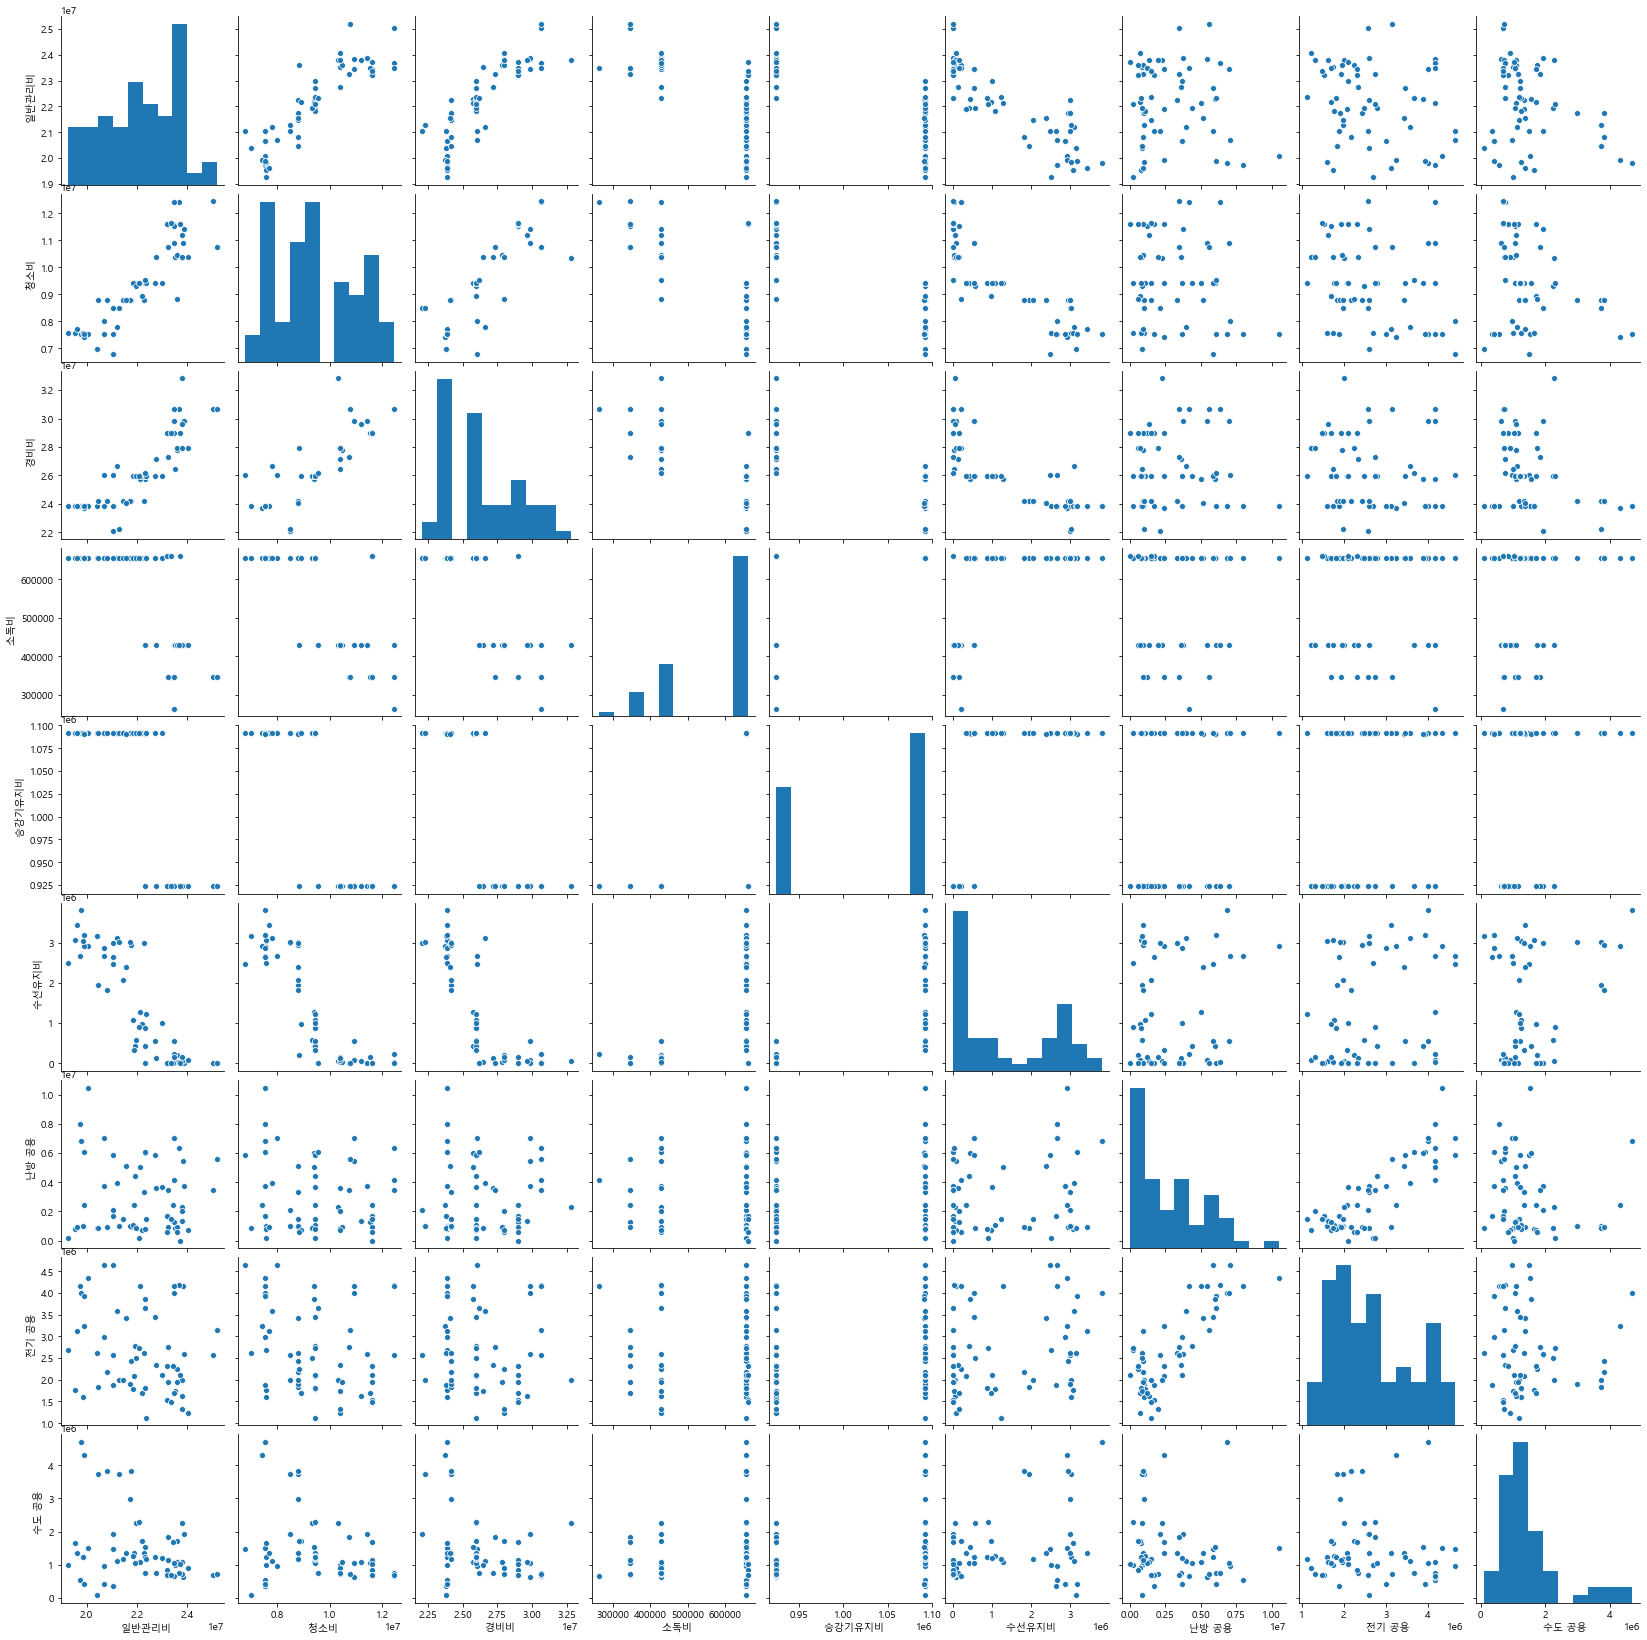

In [22]:
sns.pairplot(apartdata_c)
plt.show()

### 공용관리비 Feature들간의 상관관계

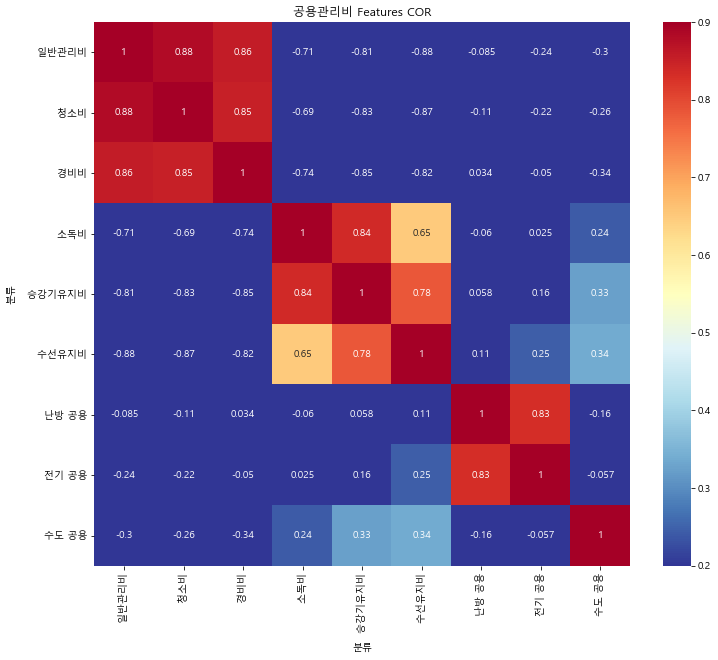

In [20]:
# plt 한글 깨짐 방지 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


correlation=apartdata_c.corr()
plt.figure(figsize=(12,10))

sns.heatmap(correlation, cmap=plt.cm.RdYlBu_r,  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('공용관리비 Features COR');

###  시기별 추이 선 그래프

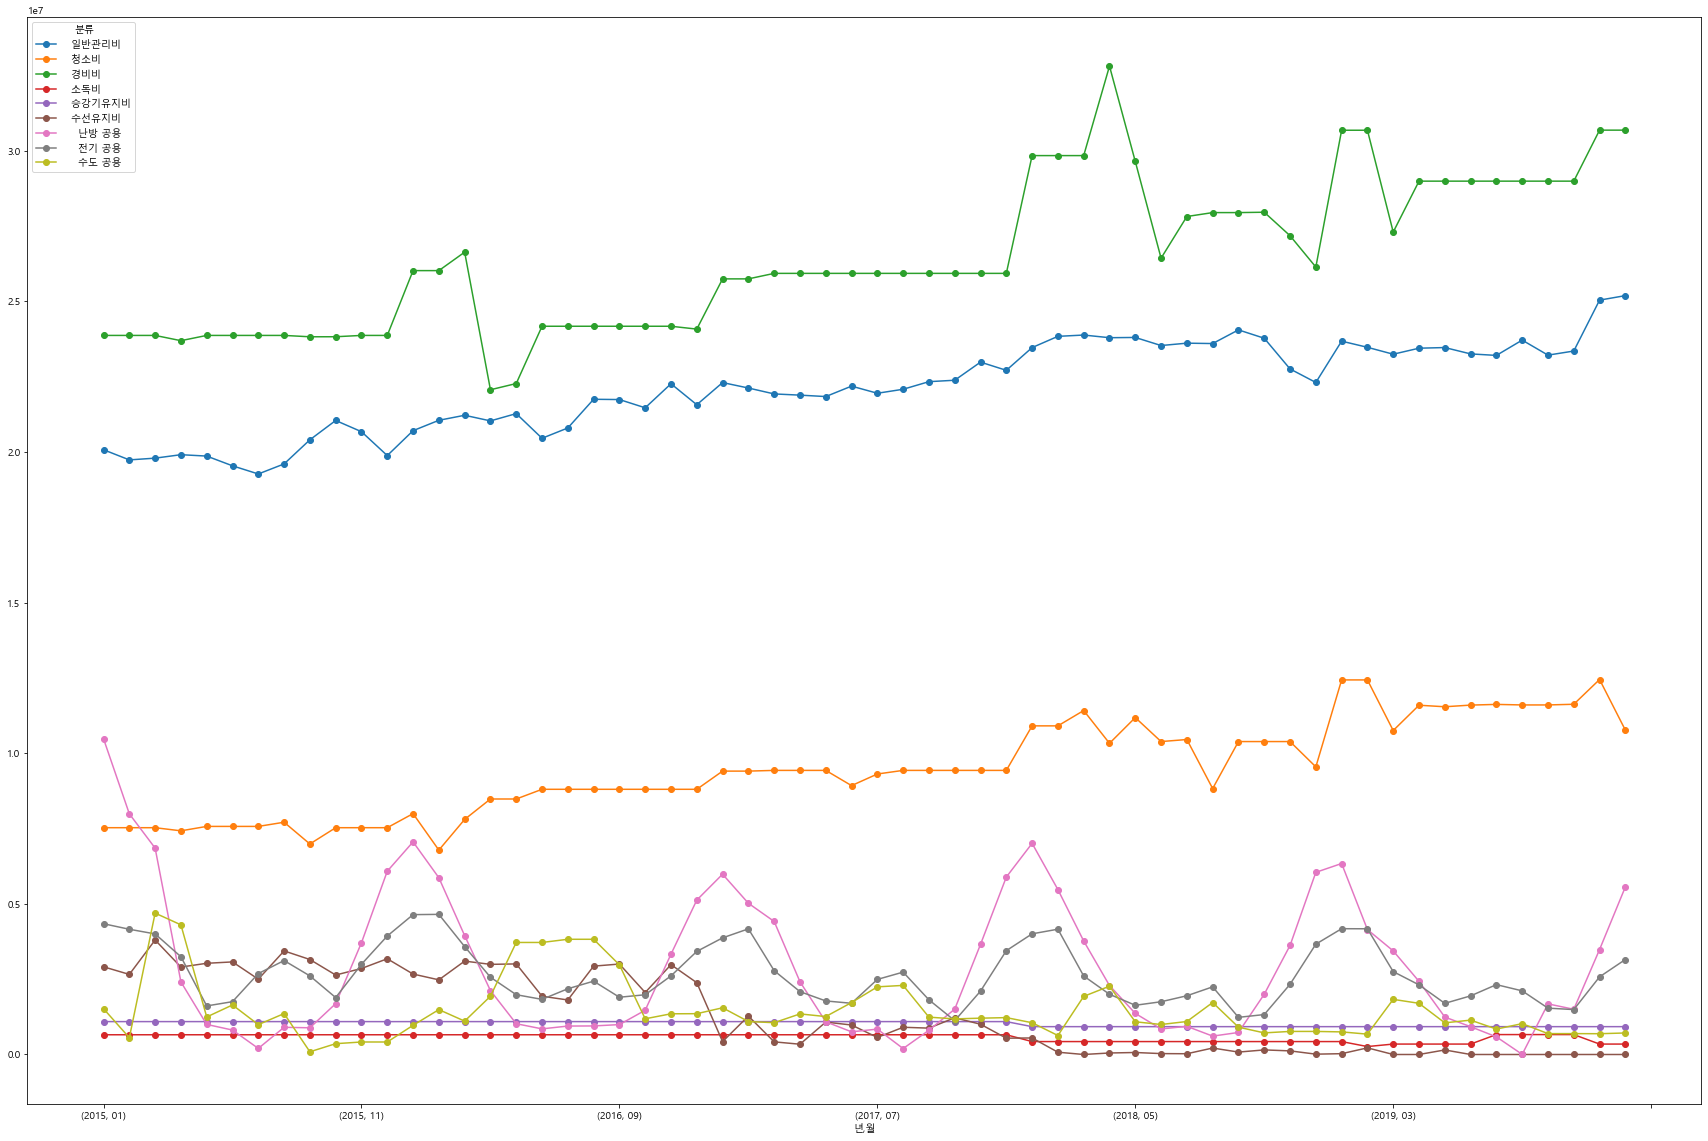

In [21]:
apartdata_c.plot(figsize=(30,20), marker="o") #근래에 가까울수록 조금씩 증가선

### 이상치 확인 

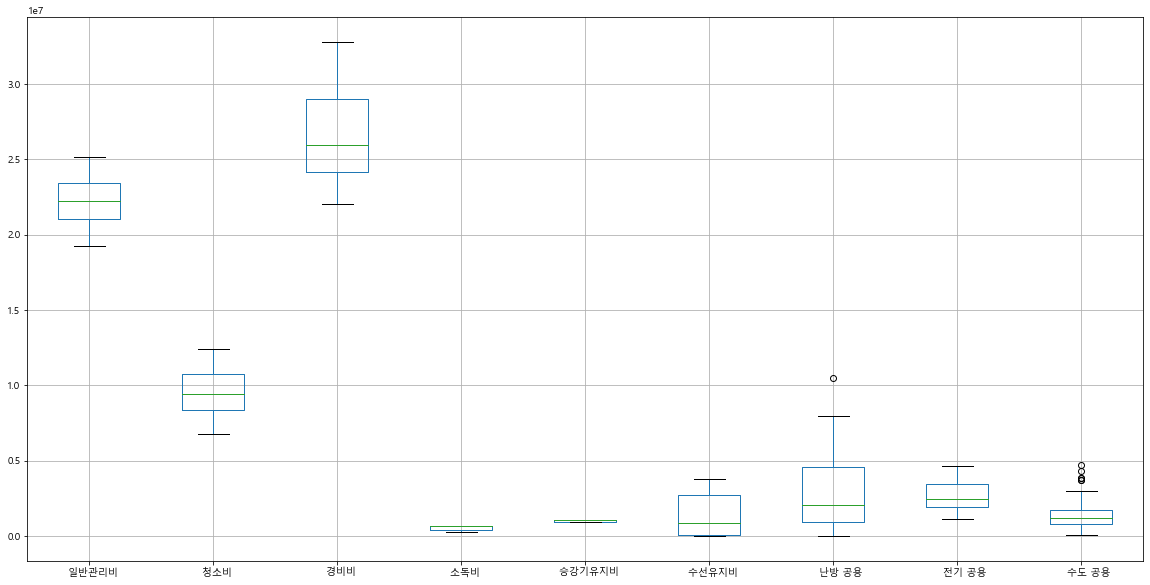

In [24]:
apartdata_c.boxplot(figsize=(20,10))

#난방공용 , 수도공용에서 발견

In [27]:
#난방 공용 이상치 처리
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))
outliers_iqr(apartdata_c["    난방 공용"])

(array([0], dtype=int64),)

In [35]:
#난방공용과 가장 상관관계가 높은 전기공용의 증가 추이로 이상치 대체
apartdata_c["    전기 공용"].values[0]/apartdata_c["    전기 공용"].values[1] #1월이 2월보다 1.0440685785983066배 큼

1.0440685785983066

In [43]:
apartdata_c["    난방 공용"].values[0]=apartdata_c["    난방 공용"].values[1]*1.044

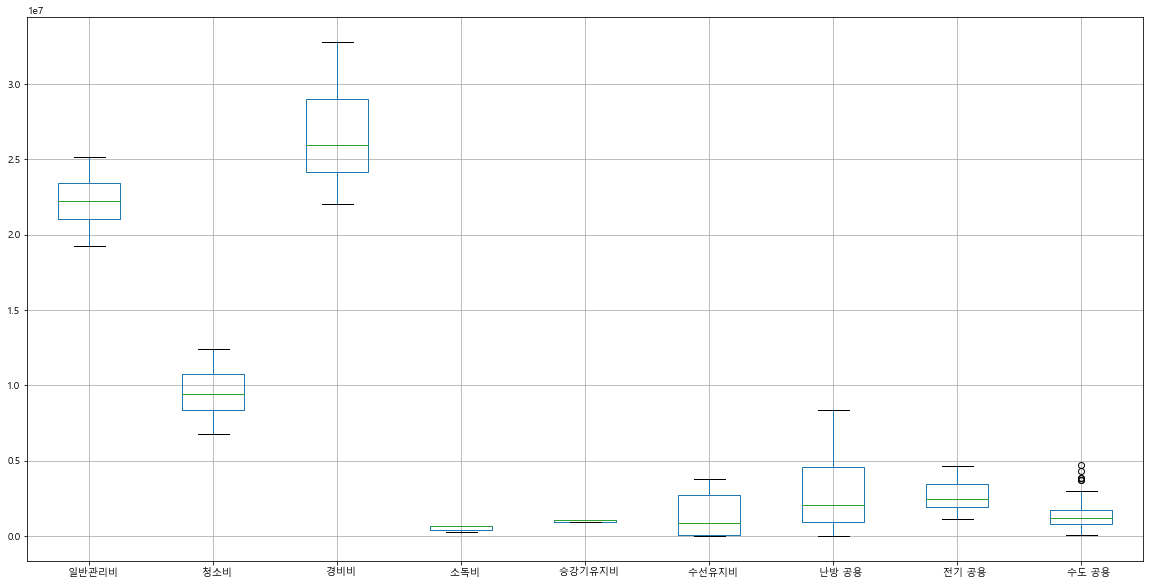

In [46]:
apartdata_c.boxplot(figsize=(20,10))

In [47]:
#수도 공용 이상치 처리

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))
outliers_iqr(apartdata_c["    수도 공용"])


(array([ 2,  3, 16, 17, 18, 19], dtype=int64),)

In [48]:
#상관관계도 높은 Feature도 없고, 대체해줄 만한 방법을 생각하지 못함.
apartdata_c["    수도 공용"]

년     월 
2015  01    1519455
      02     557425
      03    4693430
      04    4304100
      05    1245270
      06    1644480
      07     991250
      08    1358600
      09      89525
      10     358925
      11     414900
      12     414900
2016  01     968450
      02    1489860
      03    1107475
      04    1933975
      05    3719100
      06    3719100
      07    3824620
      08    3824620
      09    2976360
      10    1185160
      11    1351110
      12    1354610
2017  01    1550745
      02    1094245
      03    1055900
      04    1347100
      05    1259450
      06    1723950
      07    2245570
      08    2293570
      09    1239220
      10    1182120
      11    1205410
      12    1224210
2018  01    1054230
      02     630030
      03    1929175
      04    2267575
      05    1085870
      06     995770
      07    1094815
      08    1725715
      09     907075
      10     717175
      11     765660
      12     765660
2019  01     750115
      02   

### 공용관리비 5년(2020~2024) 예측  

In [57]:
#본 데이터를 가지고 train/test 으로 나누어 학습 후 5년을 예측하는 모델 생성

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [61]:
#데이터셋 분할 후 정규화

X = apartdata_c.drop(['  일반관리비'],axis=1)
y = apartdata_c['  일반관리비']

scaler = MinMaxScaler()
X_scale = scaler.fit_transform(X)

xtrain, xtest, ytrain, ytest = train_test_split(X_scale,y,train_size = 0.7, random_state=777)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(42, 8) (18, 8) (42,) (18,)


In [63]:
from sklearn.neural_network import MLPRegressor
MLR=MLPRegressor(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(50,50))
MLR.fit(xtrain, ytrain)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 50), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [64]:
MLR.score(xtrain, ytrain)

0.8697722026787686

In [65]:
#예측
pred=MLR.predict(xtest)

In [86]:
svc_score = pd.DataFrame({'실제값':ytest, '예측값':np.round(pred), '오차':np.round(pred-ytest)})
svc_score

,,실제값,예측값,오차
년,월,,,
2016,06,20456480,21508432.0,1051952.0
2017,10,22383050,22354770.0,-28280.0
2019,06,23257490,23879258.0,621768.0
2018,09,24054520,23463289.0,-591231.0
2019,11,25042440,24369878.0,-672562.0
2016,10,21468420,21284563.0,-183857.0
2018,01,23467350,23421885.0,-45465.0
2015,10,21047220,20619671.0,-427549.0
2016,11,22266120,20846535.0,-1419585.0
